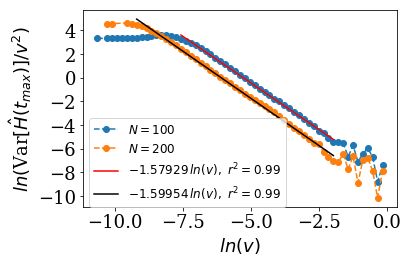

In [1]:
####### Code by Matt Richards ###################################
####
#### This code takes data from a time dynamics simulation 
#### of a BEC-impurity double well model and finds scaling for
#### dynamic fidelity susceptibility
################################################################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib

### Take data from directory ###
dir = "./"
file = "fish_N100_moredata.txt"
fn=np.loadtxt(dir+file, dtype=np.double)
file2 = "fish_N200_moredata.txt"
fn2=np.loadtxt(dir+file2, dtype=np.double)
nowcol = 'r'
nowpt = 'o'

############################################
### Modify font and text for readability ###
############################################

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}


matplotlib.rc('font', **font)

### This value corresponds to the data point with a maximum value in fidelity susceptibility
q=2199
q2=2126

### Take different portions of the data for linear regression and plotting ###
y=[math.log(fn[j*4001+q,0]/(fn[j*4001+q,2]*fn[j*4001+q,2])) for j in range(0,58)]#/(fn2[j*41+21,2]*fn2[j*41+21,2])
x=[math.log(fn[j*4001+q,2]) for j in range(0,58)]
y2=[math.log(fn2[3982+j*4001+q2,0]/(fn2[3982+j*4001+q2,2]*fn2[3982+j*4001+q2,2])) for j in range(0,55)]#/(fn2[j*41+21,2]*fn2[j*41+21,2])
x2=[math.log(fn2[3982+j*4001+q2,2]) for j in range(0,55)]
y3=[math.log(fn[j*4001+q,0]/(fn[j*4001+q,2]*fn[j*4001+q,2])) for j in range(16,48)]#/(fn2[j*41+21,2]*fn2[j*41+21,2])
x3=[math.log(fn[j*4001+q,2]) for j in range(16,48)]
y4=[math.log(fn2[3982+j*4001+q2,0]/(fn2[3982+j*4001+q2,2]*fn2[3982+j*4001+q2,2])) for j in range(4,45)]#/(fn2[j*41+21,2]*fn2[j*41+21,2])
x4=[math.log(fn2[3982+j*4001+q2,2]) for j in range(4,45)]

### Applying linear regression to the data selected ###
fit3 = np.polyfit(x3,y3,1)
fit_fn3 = np.poly1d(fit3) 
fit4 = np.polyfit(x4,y4,1)
fit_fn4 = np.poly1d(fit4) 

### Determine Least Squares constants of interest (slope, y-intercept, coefficient of determination) ###
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x3, y3)
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(x4, y4)

### Plot data and line of best fit ###
plt.plot(x,y, ls='--',marker='o',label='$N=100$')
plt.plot(x2,y2, ls='--',marker='o',label='$N=200$')#+ %.6s, $r^2$=%.8s
plt.plot(x3, fit_fn3(x3), '--r',ls='-', label=r'$%.8s\, ln(v),\,\, r^2=%.4s$'%(slope3,math.pow(r_value3,2)))
plt.plot(x4, fit_fn4(x4), '--k',ls='-', label=r'$%.8s\, ln(v),\,\, r^2=%.4s$'%(slope4,math.pow(r_value4,2)))
    
nowcol = 'b'
nowpt = 'o'

plt.legend(bbox_to_anchor=(0.02, 0.45), loc=2, borderaxespad=0., prop={'size':12})

### Plotting Options #####
#plt.title("Scaling of the QFI vs quench speed for BJJ-impurity model")
plt.xlabel("$ln(v)$")
plt.ylabel(r"$ln($Var$[\hat{H}(t_{max})]/v^2)$")#r"$F(t)=|<\psi(t)|\psi(t)+\Delta t>|^2$")#
plt.tight_layout()
plt.yticks(np.arange(-10.0, 4.1, step=2))

plt.show()
#plt.savefig("./"+'fishred_vscaleW=Wmax_defense.jpg',dpi=300)